In [75]:
import seml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [76]:
results = seml.get_results('startup_computer_vision_prune', to_data_frame=True)

  0%|          | 0/597 [00:00<?, ?it/s]

  0%|          | 0/597 [00:00<?, ?it/s]

In [77]:
result_cols = [col for col in results.columns if col.startswith("result")]

In [78]:
# results = results.groupby(['config.arguments.method'])[
#     result_cols
# ].agg('mean')

In [79]:
results = results.reset_index()

In [80]:
results.loc[:, ['config.arguments.model', 'config.arguments.speed_up', 'config.arguments.method','result.ops', 'result.best_acc']]

,config.arguments.model,config.arguments.speed_up,config.arguments.method,result.ops,result.best_acc
0,resnet50,2,l1,6.471893e+08,0.7665
1,resnet50,3,l1,4.322777e+08,0.5632
2,resnet50,4,l1,3.259936e+08,0.0100
3,resnet50,5,l1,2.604704e+08,0.4158
4,resnet50,6,l1,2.160173e+08,0.3996
5,resnet50,7,l1,1.864091e+08,0.4099
6,resnet50,8,l1,1.621838e+08,0.0100
7,resnet50,9,l1,1.432930e+08,0.4055
8,resnet50,10,l1,1.297460e+08,0.3979
9,resnet50,2,snip,6.516929e+08,0.7853


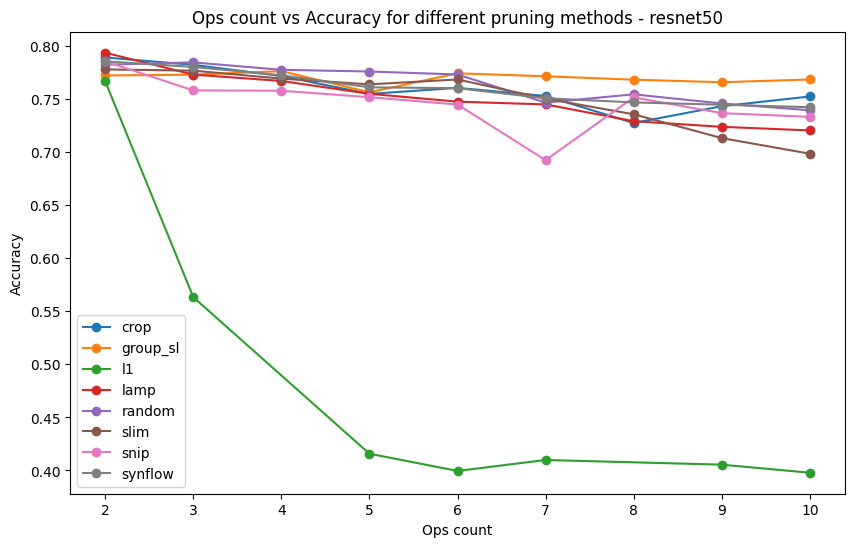

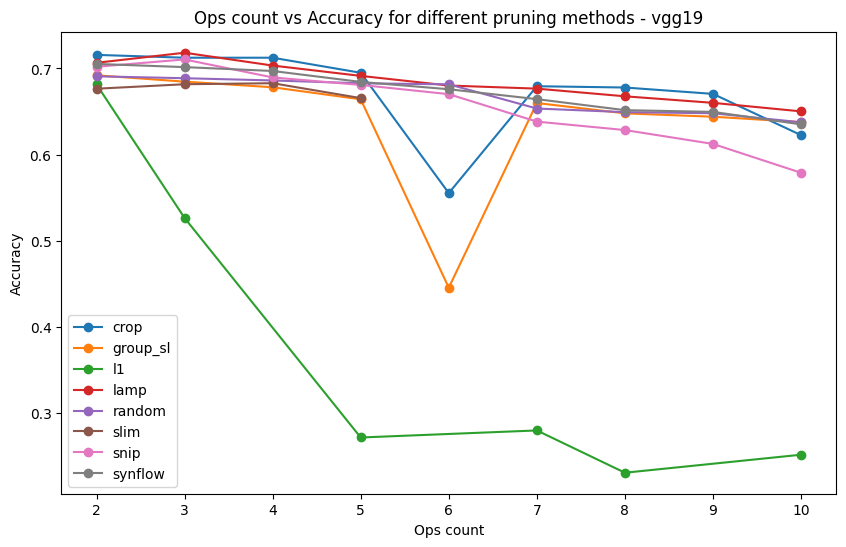

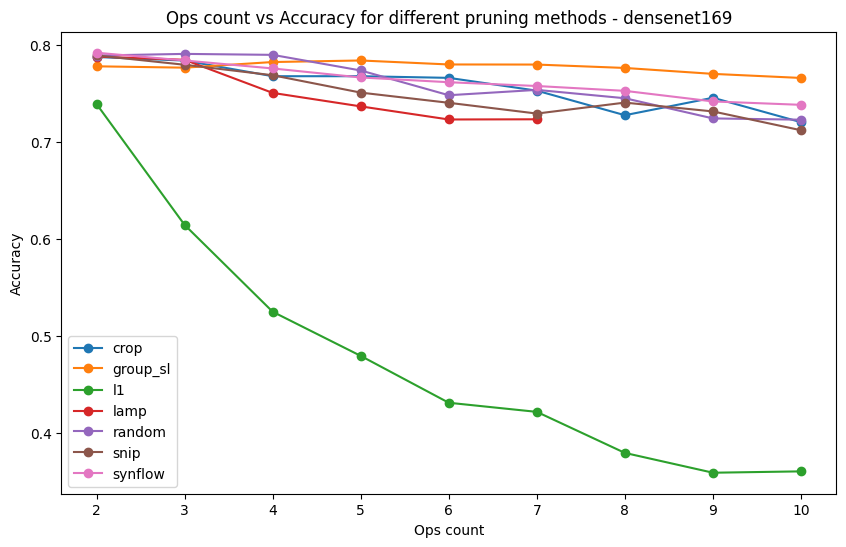

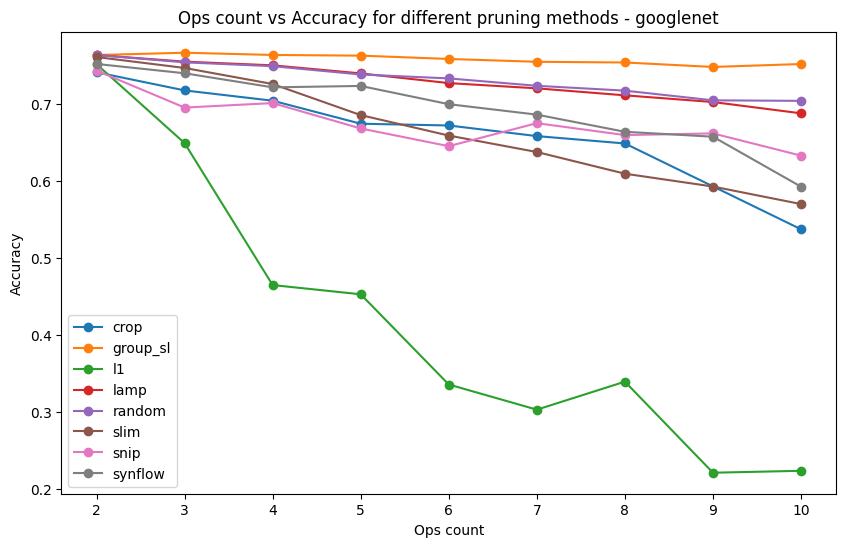

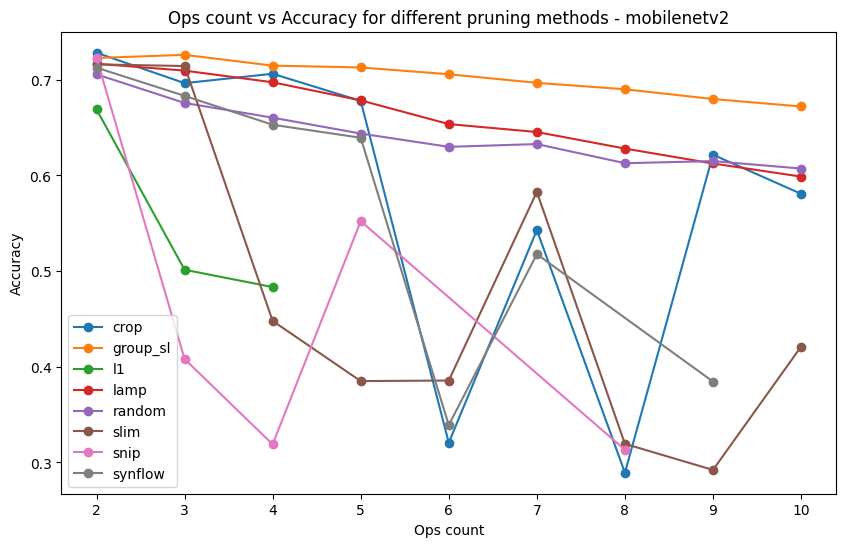

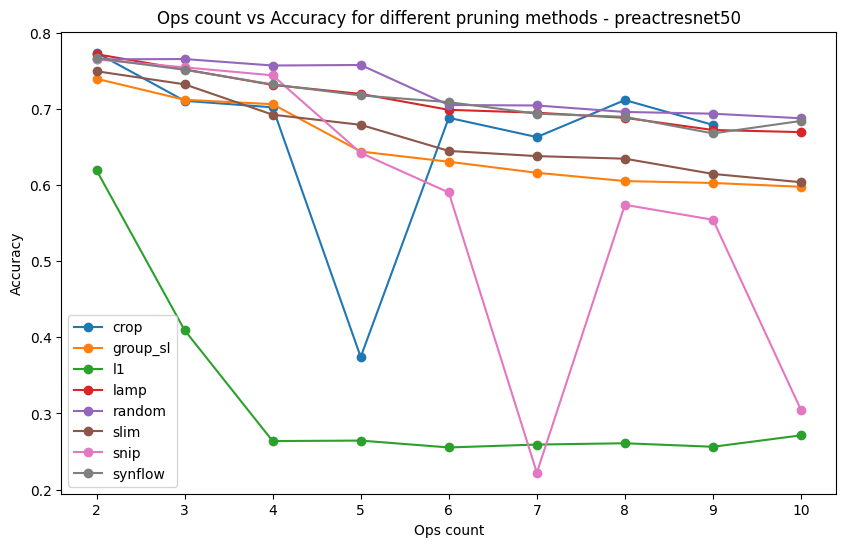

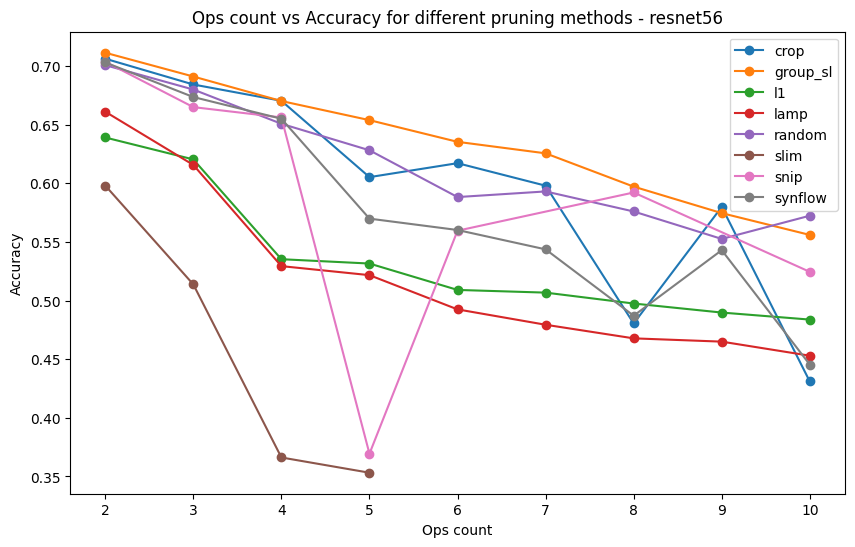

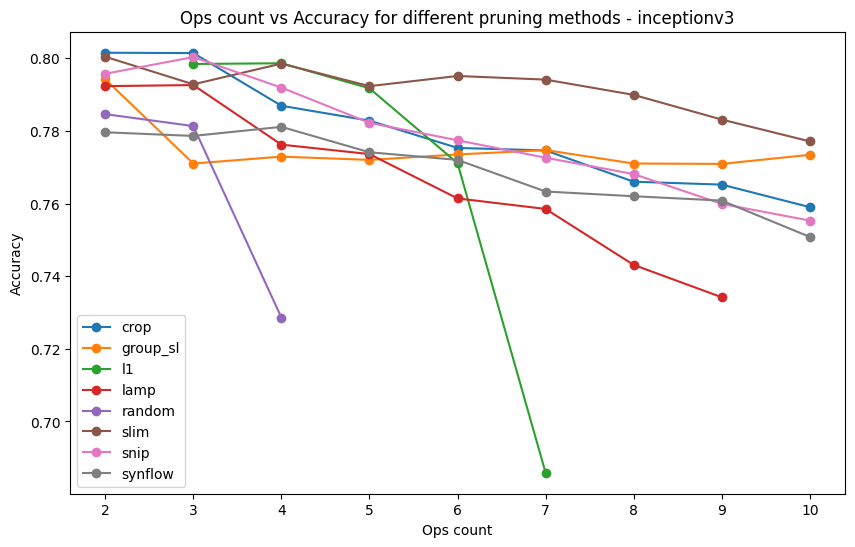

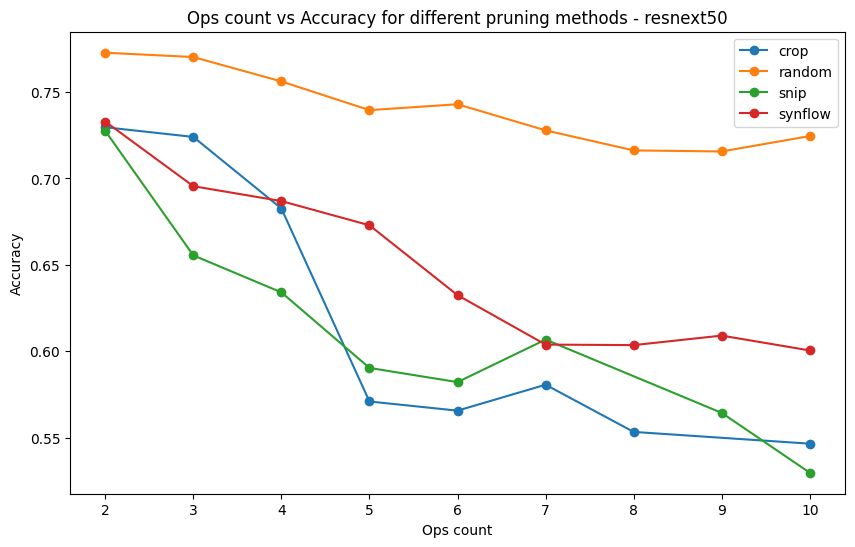

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame already exists, named 'df'
# with columns 'config.arguments.model', 'config.arguments.method', 'result.ops', and 'result.best_acc'

# Get a list of unique models in the DataFrame
models = results["config.arguments.model"].unique()

# Loop through each model
for model in models:
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel("Ops count")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Ops count vs Accuracy for different pruning methods - {model}")

    # Filter the data for the current model
    model_data = results[results["config.arguments.model"] == model]

    # Group the data by the pruning method
    grouped_data = model_data.groupby("config.arguments.method")

    # Loop through the grouped data and plot a line for each pruning method
    for method, group in grouped_data:
        ax.plot(group["config.arguments.speed_up"], group["result.best_acc"], marker="o", label=method)

    # Add a legend and show the plot
    ax.legend()
    plt.show()


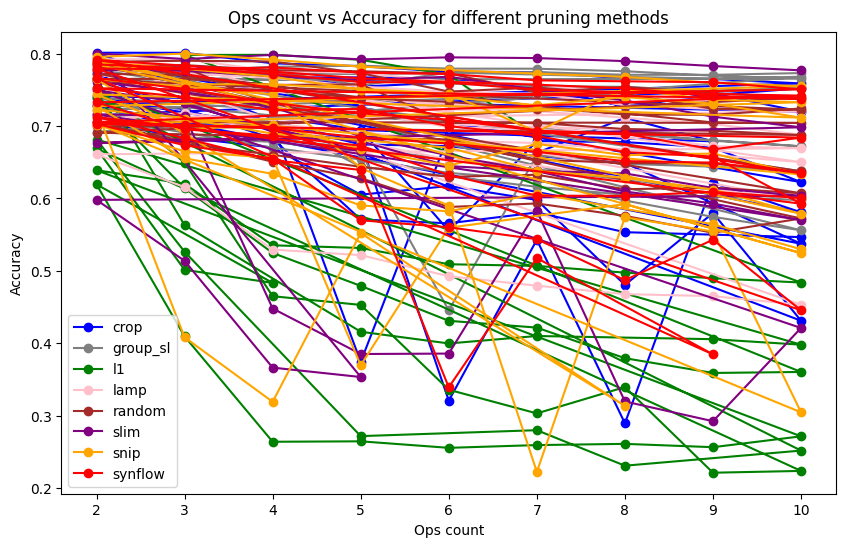

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame already exists, named 'df'
# with columns 'config.arguments.model', 'config.arguments.method', 'result.ops', and 'result.best_acc'

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Ops count")
ax.set_ylabel("Accuracy")
ax.set_title("Ops count vs Accuracy for different pruning methods")

# Define a dictionary of colors for each pruning method
method_colors = {
    "crop": "blue",
    "snip": "orange",
    "l1": "green",
    "synflow": "red",
    "slim": "purple",
    "random": "brown",
    "lamp": "pink",
    "group_sl": "gray"
}

# Group the data by pruning method
grouped_data = results.groupby("config.arguments.method")

# Loop through the grouped data and plot a line for each group
for method, group in grouped_data:
    color = method_colors[method]
    ax.plot(group["result.ops"], group["result.best_acc"], marker="o", label=method, color=color)

# Add a legend and show the plot
ax.legend()
plt.show()


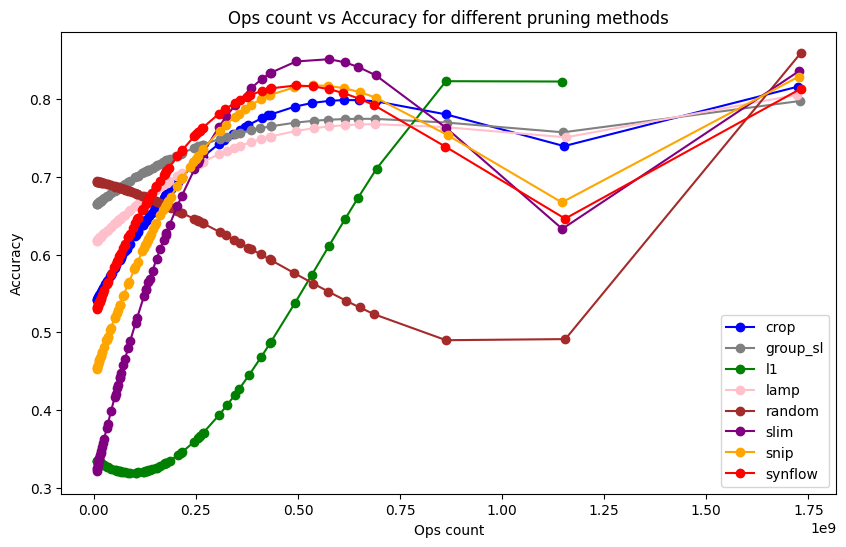

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Assuming the DataFrame already exists, named 'results'
# with columns 'config.arguments.model', 'config.arguments.method', 'result.ops', and 'result.best_acc'

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Ops count")
ax.set_ylabel("Accuracy")
ax.set_title("Ops count vs Accuracy for different pruning methods")

# Define a dictionary of colors for each pruning method
method_colors = {
    "crop": "blue",
    "snip": "orange",
    "l1": "green",
    "synflow": "red",
    "slim": "purple",
    "random": "brown",
    "lamp": "pink",
    "group_sl": "gray"
}

# Group the data by pruning method
grouped_data = results.groupby("config.arguments.method")

# Loop through the grouped data and plot a line for each pruning method
for method, group in grouped_data:
    color = method_colors[method]
    mean_data = group.groupby("result.ops").mean()
    spline = UnivariateSpline(mean_data.index, mean_data["result.best_acc"], s=10)
    x_smooth = mean_data.index
    y_smooth = spline(x_smooth)
    ax.plot(x_smooth, y_smooth, marker="o", label=method, color=color)

# Add a legend and show the plot
ax.legend()
plt.show()


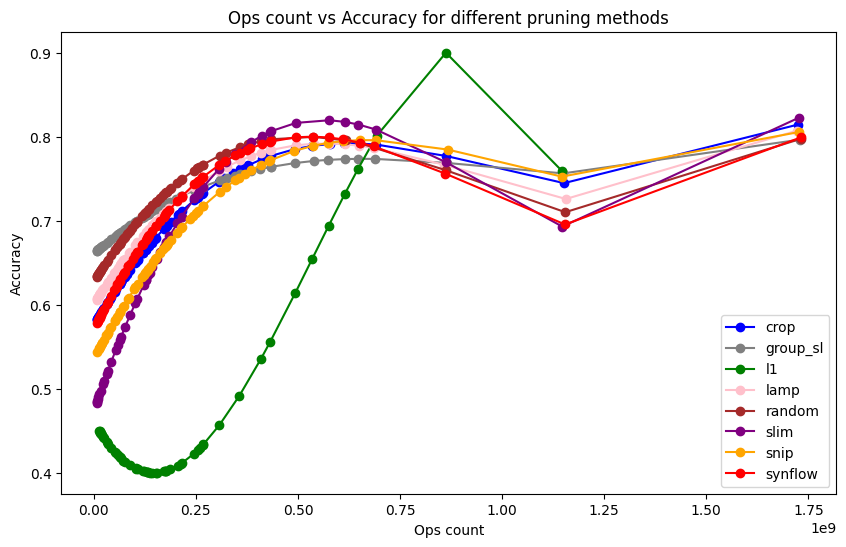

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Assuming the DataFrame already exists, named 'df'
# with columns 'config.arguments.model', 'config.arguments.method', 'result.ops', and 'result.best_acc'

# Remove rows where result.best_acc < 0.2
results = results[results["result.best_acc"] >= 0.2]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Ops count")
ax.set_ylabel("Accuracy")
ax.set_title("Ops count vs Accuracy for different pruning methods")

# Define a dictionary of colors for each pruning method
method_colors = {
    "crop": "blue",
    "snip": "orange",
    "l1": "green",
    "synflow": "red",
    "slim": "purple",
    "random": "brown",
    "lamp": "pink",
    "group_sl": "gray"
}

# Group the data by pruning method
grouped_data = results.groupby("config.arguments.method")

# Loop through the grouped data and plot a line for each pruning method
for method, group in grouped_data:
    color = method_colors[method]
    mean_data = group.groupby("result.ops").mean()
    spline = UnivariateSpline(mean_data.index, mean_data["result.best_acc"], s=3)
    x_smooth = mean_data.index
    y_smooth = spline(x_smooth)
    ax.plot(x_smooth, y_smooth, marker="o", label=method, color=color)

# Add a legend and show the plot
ax.legend()
plt.show()


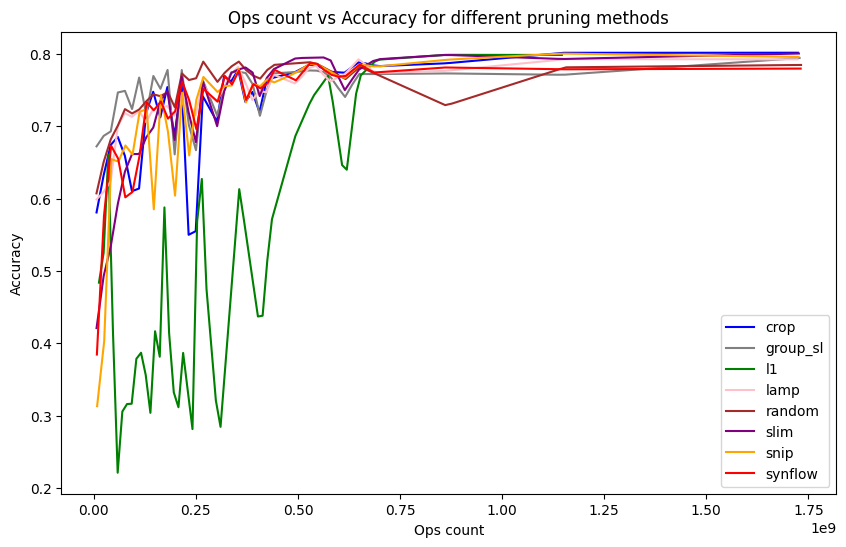

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Assuming the DataFrame already exists, named 'df'
# with columns 'config.arguments.model', 'config.arguments.method', 'result.ops', and 'result.best_acc'

# Remove rows where result.best_acc < 0.2
results = results[results["result.best_acc"] >= 0.2]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Ops count")
ax.set_ylabel("Accuracy")
ax.set_title("Ops count vs Accuracy for different pruning methods")

# Define a dictionary of colors for each pruning method
method_colors = {
    "crop": "blue",
    "snip": "orange",
    "l1": "green",
    "synflow": "red",
    "slim": "purple",
    "random": "brown",
    "lamp": "pink",
    "group_sl": "gray"
}

# Group the data by pruning method
grouped_data = results.groupby("config.arguments.method")

# Loop through the grouped data and plot a line for each pruning method
for method, group in grouped_data:
    color = method_colors[method]
    mean_data = group.groupby("result.ops").mean()
    cubic_interp = interp1d(mean_data.index, mean_data["result.best_acc"], kind='linear')
    
    x_smooth = np.linspace(mean_data.index.min(), mean_data.index.max(), num=100)
    y_smooth = cubic_interp(x_smooth)
    
    ax.plot(x_smooth, y_smooth, label=method, color=color)

# Add a legend and show the plot
ax.legend()
plt.show()


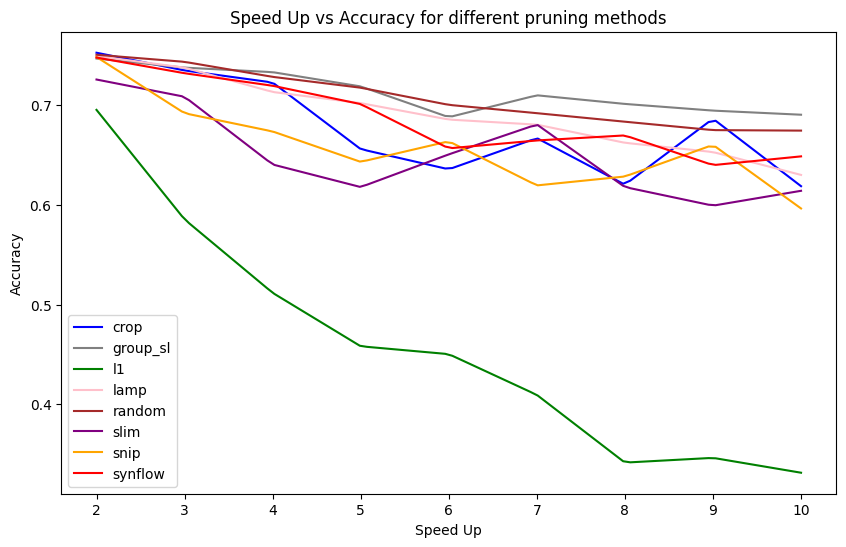

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Assuming the DataFrame already exists, named 'df'
# with columns 'config.arguments.model', 'config.arguments.method', 'result.ops', and 'result.best_acc'

# Remove rows where result.best_acc < 0.2
results = results[results["result.best_acc"] >= 0.2]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Speed Up")
ax.set_ylabel("Accuracy")
ax.set_title("Speed Up vs Accuracy for different pruning methods")

# Define a dictionary of colors for each pruning method
method_colors = {
    "crop": "blue",
    "snip": "orange",
    "l1": "green",
    "synflow": "red",
    "slim": "purple",
    "random": "brown",
    "lamp": "pink",
    "group_sl": "gray"
}

# Group the data by pruning method
grouped_data = results.groupby("config.arguments.method")

# Loop through the grouped data and plot a line for each pruning method
for method, group in grouped_data:
    color = method_colors[method]
    mean_data = group.groupby("config.arguments.speed_up").mean()
    cubic_interp = interp1d(mean_data.index, mean_data["result.best_acc"], kind='linear')
    
    x_smooth = np.linspace(mean_data.index.min(), mean_data.index.max(), num=100)
    y_smooth = cubic_interp(x_smooth)
    
    ax.plot(x_smooth, y_smooth, label=method, color=color)

# Add a legend and show the plot
ax.legend()
plt.show()
